<a href="https://colab.research.google.com/github/Orley74/ML_projects_python/blob/main/MargoSaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program rozwiązuje gre logiczną w grze przeglądarkowej Margonem

import tf


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

do wyswietlania tez matplotlib

In [ ]:
import matplotlib.pyplot as plt

podpiecie karty graficznej zeby bylo szybciej


In [ ]:

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)


mozliwe ze w folderze pojawi sie folder z zapisami poprzedniej wersji coś w stylu back-up ale przeszkadza on w wynikach więc go usuwam

In [ ]:
import os
folder_path = "sl"

checkpoint_folder = os.path.join(folder_path, ".ipynb_checkpoints")

if os.path.exists(checkpoint_folder):
    os.system(f"rm -rf {checkpoint_folder}")  # Dla systemów Unix/Linux
    # os.system(f"rmdir /s {checkpoint_folder}")  # Dla systemu Windows
    print(".ipynb_checkpoints folder został usunięty.")
else:
    print("Brak folderu .ipynb_checkpoints.")

.ipynb_checkpoints folder został usunięty.


pobranie danych z folderu i stworzenie iteratora i batch (sluza do skakania po dancyh, iterator ma wszystkie a batch przechowuje po 32 elementy)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('sl',image_size=(40, 40))


Found 250 files belonging to 5 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

wyswietlenie posiadanych grafik oraz nad nimi klasy do ktorej naleza

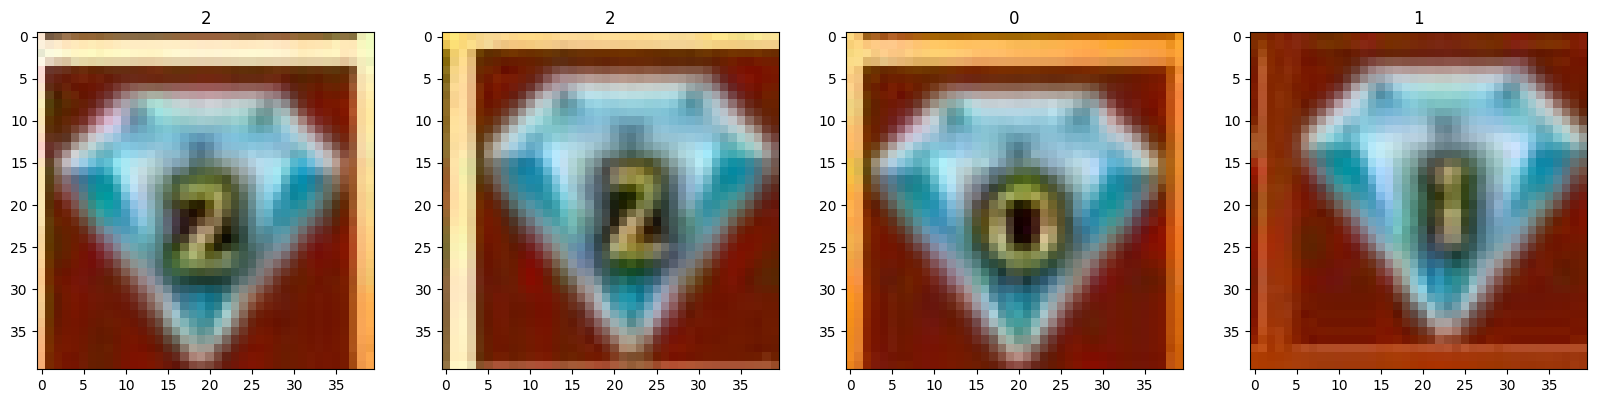

In [ ]:
fig, ax = plt.subplots(ncols= 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

mapowanie danych zeby mialo wartosci od 0.0 do 1.0

In [ ]:

data = data.map(lambda x, y: (x / 255, y))

scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

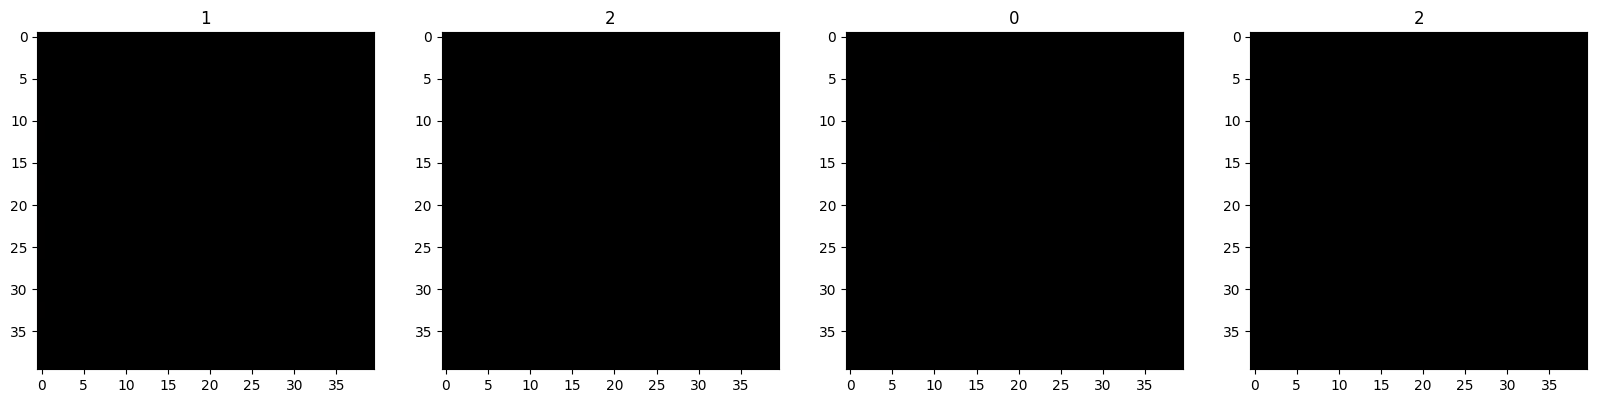

In [ ]:
fig, ax = plt.subplots(ncols= 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
len(data)

8

podzielenie na dane treningowe, walidacyjne i testowe. Tutaj okreslam dlugosc tych danych w batch

In [ ]:
train_data = int(len(data) * .7)
val_data = int(len(data) * .2)+1
test_data = int(len(data) * .1)+1

In [ ]:
train_data, val_data, test_data

(5, 2, 1)

dodanie wartosci do danych na podstawie wczesniej przydzielonych numerow batch

In [ ]:
train = data.take(train_data)
val = data.skip(train_data).take(val_data)
test = data.skip(train_data + val_data).take(test_data)

stworzenie modelu sieci neuronowej

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(40, 40, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3, 3), 1, activation='relu'))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 38, 38, 16)        448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 19, 19, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 17, 17, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 6, 6, 16)          4624      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 16)        

okreslenie sposobu jak siec bedzie sie uczyc

In [ ]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
logdir='logs'
tf_log = tf.keras.callbacks.TensorBoard(log_dir=logdir)

uczenie sieci

In [ ]:
hist = model.fit(train, epochs=200, validation_data = val, callbacks = [tf_log])

Epoch 1/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0166 - accuracy: 0.9937 - val_loss: 0.0241 - val_accuracy: 0.9844
Epoch 2/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0135 - accuracy: 0.9937 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 3/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 7.5311e-04 - val_accuracy: 1.0000
Epoch 4/200
5/5 [==============================] - 0s 26ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 5/200
5/5 [==============================] - 0s 22ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 6/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/200
5/5 [==============================] - 0s 27ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 8/200
5/5 

pokazanie wynikow uczenia (loss i accuracy) na wykresie

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'],c='r',label='loss')
ax[0].plot(hist.history['accuracy'],c='g',label='accuracy')
ax[0].title.set_text('train')

ax[1].plot(hist.history['val_loss'],c='r',label='loss')
ax[1].plot(hist.history['val_accuracy'],c='g',label='accuracy')
ax[1].title.set_text('val')

fig.legend(loc='upper left')

NameError: ignored

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


sprawdzenie wynikow

In [ ]:
preds = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    print(y)




1/1 [==============================] - 0s 39ms/step
[3 2 2 2 1 4 3 3 1 1 1 1 1 3 4 1 0 3 2 2 1 1 2 4 0 0 0 1 3 1 1 3]
1/1 [==============================] - 0s 34ms/step
[3 3 1 1 1 2 2 3 2 3 4 3 4 2 3 3 3 3 4 2 2]


In [ ]:
for arg in yhat:
  preds.append(np.argmax(arg))
  a = np.argmax(arg)


In [ ]:
preds

[1, 1, 1, 3, 4, 2, 4, 1, 2, 0, 4, 2, 0, 0, 1, 3, 1, 1, 2, 2, 3]

In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model.save(os.path.join('models','margo.h5'))